In [5]:
name

'results/precision20'

In [20]:
i = 0
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
number_of_angles = 400
angles = np.pi * np.linspace(0, 2, number_of_angles)
precision = 20
#t_list = [0.0001, 0.01, 0.01, 0.02, 0.025,0.1]
#t_list = [0.05,0.1,0.25,0. 5,1]

t_list = [1E-6, 1E-5, 1E-4, 1E-3, 0.01, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
#t_list = [1E-4, 1E-3, 0.01, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5]

name = (
    "results/"
    + "precision"
    + str(precision))


#my_dict = np.load(name + '0.npy', allow_pickle = True, encoding = 'latin1')
my_dict = np.load(name + '.npy', allow_pickle = True, encoding = 'latin1')
    
far_field = my_dict.item().get('far_field')
far_field_p = my_dict.item().get('far_field_p')
far_field_eta = my_dict.item().get('far_field_eta')


df = pd.DataFrame(columns = ['t', 'angle', 'cs', 'case'])

res_list_0 = []
res_list_FOA = []

FF = far_field
FF_p = far_field_p
N = angles.shape[0]

err_0_list = []
err_1_list = []
for t in t_list:

    FF_eta = far_field_eta[i]
    
    
    residual_eta = FF_eta - FF
    residual_p = FF_eta - FF - t * FF_p
    
    err_0 = np.linalg.norm(residual_eta)/np.linalg.norm(far_field)
    err_FOA = np.linalg.norm(residual_p)/ np.linalg.norm(far_field)
    
    print(t,err_0, err_FOA, '0 | 1')
    
    cs = 10 * np.log10(4 * np.pi * np.sum(np.abs(FF)**2, axis=0))
    cs_eta = 10 * np.log10(4 * np.pi * np.sum(np.abs(FF_eta)**2, axis=0))
    cs_FOA = 10 * np.log10(4 * np.pi * np.sum(np.abs(FF + t * FF_p)**2, axis=0))
    
    # case = 0
    df1 = pd.DataFrame({
                't': N * [t],
                'angles': angles, 
                'cs': cs,
                'case': N * ['0']
            })
    df = pd.concat([df, df1])

    # case = t
    df1 = pd.DataFrame({
                't': N * [t],
                'angles': angles, 
                'cs': cs_eta,
                'case': N * ['t']
            })
    df = pd.concat([df, df1])

    # case = 1
    df1 = pd.DataFrame({
                't': N * [t],
                'angles': angles, 
                'cs': cs_FOA,
                'case': N * ['1']
            })
    df = pd.concat([df, df1])
    
    res_list_0.append(err_0)
    res_list_FOA.append(err_FOA)
    i += 1
    
df['t'] = df['t'].astype("category")    
df['case'] = df['case'].astype(str).astype("category")    

new_categories = [r'$F_0$', r'$F_t$', r"$F_0 + t F'$"]
df['case'] = df['case'].cat.rename_categories(new_categories)

rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
cmap = sns.blend_palette(rgb, n_colors=4)

pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

colors = [pink, blue, green]
my_palette = sns.blend_palette(colors, n_colors=3)
my_palette


1e-06 0.005968772603269239 0.005969104205190782 0 | 1
1e-05 0.0059654549397494825 0.005968753948714995 0 | 1
0.0001 0.0059362322325753674 0.00596750466095939 0 | 1
0.001 0.0058593526487757215 0.0059915620352213326 0 | 1
0.01 0.01601804656230522 0.00737638271379596 0 | 1
0.01 0.01601804656229994 0.0073763827138072485 0 | 1
0.02 0.031573548359267026 0.01045862222990959 0 | 1
0.025 0.03951563260780897 0.012284461061445378 0 | 1
0.05 0.07946356267454785 0.02281731894928261 0 | 1
0.1 0.15863600824436314 0.05002604815236697 0 | 1
0.25 0.37824070657785597 0.19373596048462638 0 | 1
0.5 0.6748381363245632 0.5755981768913332 0 | 1
1 1.1506011595045895 1.5947743079262644 0 | 1


/home/bempp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:64: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/bempp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/bempp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:82: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.1724567474048443, 0.37376393694732796, 0.6923952326028451),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137)]

In [21]:
res_list_FOA.insert(0,0)
res_list_0.insert(0,0)
t_list.insert(0,0)

res = np.array(res_list_0)
res_FOA = np.array(res_list_FOA)
t_list = np.array(t_list)

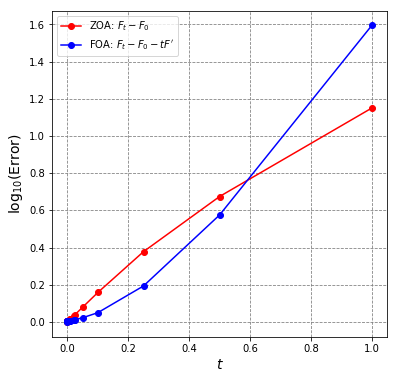

In [45]:
fig  = plt.figure(figsize=(6,6))
plt.plot(t_list, res, marker='o', label = r'ZOA: $F_t- F_0$ ', color = 'red')
plt.plot(t_list, res_FOA,marker='o', label = r"FOA: $F_t- F_0 - t F'$", color = 'blue')
plt.grid(color='gray', linestyle='dashed', which='both')
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\log_{10}($Error$)$', fontsize=14)

#plt.title(r'Far-field error on a $z=0$ unit circle', fontsize=16)    
plt.legend()
plt.savefig('plots/FOA.pdf')


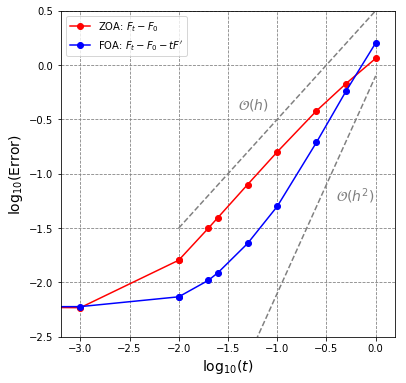

In [46]:
fig  = plt.figure(figsize=(6,6))
plt.plot(np.log10(t_list[3:]), np.log10(res[3:]) , marker='o', label = r'ZOA: $F_t- F_0$ ', color = 'red')
plt.plot(np.log10(t_list[3:]), np.log10(res_FOA[3:]),marker='o', label = r"FOA: $F_t- F_0 - t F'$", color = 'blue')

plt.plot(np.log10(t_list[5:]),.5+ np.log10(t_list[5:]), linestyle='--', color='gray')
plt.plot(np.log10(t_list[7:]), -.1 + np.log10(t_list[7:]) * 2, linestyle='--', color='gray')

plt.grid(color='gray', linestyle='dashed', which='both')

plt.xlabel(r'$\log_{10}(t)$', fontsize=14)
plt.ylabel(r'$\log_{10}($Error$)$', fontsize=14)

plt.text(-1.4, -0.4,r'$\mathcal{O}(h)$', fontsize=14, color='gray')
plt.text(-0.4, -1.25,r'$\mathcal{O}(h^2)$', fontsize=14, color='gray')

#plt.title(r'Far-field error on a $z=0$ unit circle', fontsize=16)    
plt.xlim(-3.2,0.2)
plt.ylim(-2.5, 0.5)
plt.legend()
plt.savefig('plots/FOAlog.pdf')
